In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dstrain = pd.read_csv("C:\\Users\\bekka\\projetwavestone\\train.csv" , low_memory = False)
dstore = pd.read_csv("C:\\Users\\bekka\\projetwavestone\\store.csv")

In [4]:
dstrain.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
dstrain.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
dstrain.shape


(1017209, 9)

In [7]:
dstrain.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [8]:
dstore.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
dstore.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [10]:
dstrain.shape

(1017209, 9)

In [11]:
dstrain.count(0)
#Toutes les colonnes sont remplies

Store            1017209
DayOfWeek        1017209
Date             1017209
Sales            1017209
Customers        1017209
Open             1017209
Promo            1017209
StateHoliday     1017209
SchoolHoliday    1017209
dtype: int64

In [12]:
print(" nombre des magasins fermés certains jours : {}".format(dstrain[(dstrain.Open == 0)].count()[0]))  
print(" dont pour uniquement vacances scolaires : {}".format(dstrain[(dstrain.Open == 0) & (dstrain.SchoolHoliday == 1) & (dstrain.StateHoliday == '0')].count()[0]))    
print(" et pour StateHolidays (hors vacances scolaires) : {}".format(dstrain[(dstrain.Open == 0) & (dstrain.SchoolHoliday == 0 ) & (dstrain.StateHoliday == 'a') | (dstrain.StateHoliday == 'b') |  (dstrain.StateHoliday == 'c')].count()[0]))  
print(" et pour StateHolidays (vacances scolaires comprises) : {}".format(dstrain[(dstrain.Open == 0) & (dstrain.StateHoliday == 'a') | (dstrain.StateHoliday == 'b') |  (dstrain.StateHoliday == 'c')].count()[0]))  
print(" et pour aucune de ces raisons : {} ".format(dstrain[(dstrain.Open == 0) & (dstrain. StateHoliday == '0') & (dstrain.SchoolHoliday == 0)].count()[0])) 

 nombre des magasins fermés certains jours : 172817
 dont pour uniquement vacances scolaires : 3067
 et pour StateHolidays (hors vacances scolaires) : 25255
 et pour StateHolidays (vacances scolaires comprises) : 30356
 et pour aucune de ces raisons : 139610 


In [17]:
# Les magasins fermés pour aucune raison doivent-ils être supprimés ? Bonne question ? ça dépend de ce que l'on cherche à prédire 
# TODO : tester sur dstrain et dstrain_old en gardant ces données suspectes

In [13]:
dstrain[(dstrain.Open == 0)].count()[0]

172817

In [15]:
print(" Magasins ouverts avec 0 ventes : {}".format(dstrain[(dstrain.Open == 1) & (dstrain.Sales == 0)].count()[0]))
# Aberrant ou pas ? Discussion à venir

 Magasins ouverts avec 0 ventes : 54


In [26]:
dstrain = dstrain.drop(dstrain[(dstrain.Open == 0) & (dstrain.Sales == 0)].index)
dstrain.shape
dstrain.reset_index(drop=True)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [23]:
# Un peu de statistiques et de Data Viz :) 


(844392, 9)

In [39]:
#Sales : 
dstrain.Sales.describe()
# Pour Sales, il faut enlever les lignes qui correspondent au cas : Open = 1 & Sales = 0
dstrain["Sales"]
dstrain=dstrain.drop(dstrain[(dstrain.Open == 1) & (dstrain.Sales == 0)].index)
dstrain = dstrain.reset_index(drop=True) 

(46, 41551)

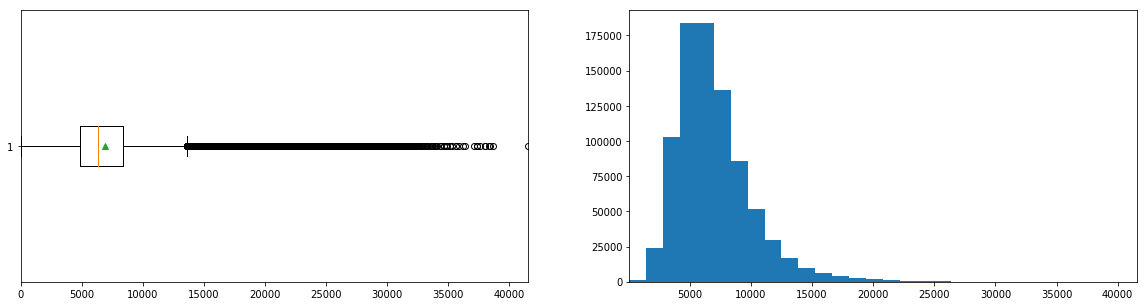

In [40]:
fig , ax = plt.subplots(1 , 2 , figsize = (20 , 5))
ax[0].boxplot(dstrain.Sales , showmeans=True , vert=False)
ax[0].set_xlim(0, max(dstrain["Sales"]))

ax[1].hist(dstrain.Sales , cumulative = False , bins = 30 )
ax[1].set_xlim((min(dstrain.Sales) , max(dstrain.Sales)))

In [41]:
print("mean : {}".format(np.mean(dstrain.Sales)))
print("median : {} ".format(np.median(dstrain.Sales)))

mean : 6955.959133664481
median : 6369.0 


In [42]:
# Il y a des magasins qui font de très grandes ventes (>15.000 par exemple) est-ce normal ou dû à des erreurs dans la BD ? Point à disucter TODO !!
# Quantité de ces données : 
print("pourcentage des ventes > 15.000 : {}".format(dstrain[dstrain.Sales>15000].count()[0]/dstrain.shape[0] * 100))

# dstrain[dstrain.Sales>15000]
# C'est normal, + de ventes et visites en période de soldes/vacances


pourcentage des ventes > 15.000 : 2.3368603568713002


In [37]:
#Idem pour customers : 


In [43]:
dstrain.Customers.describe()


count    844338.000000
mean        762.777166
std         401.194153
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

(8, 7388)

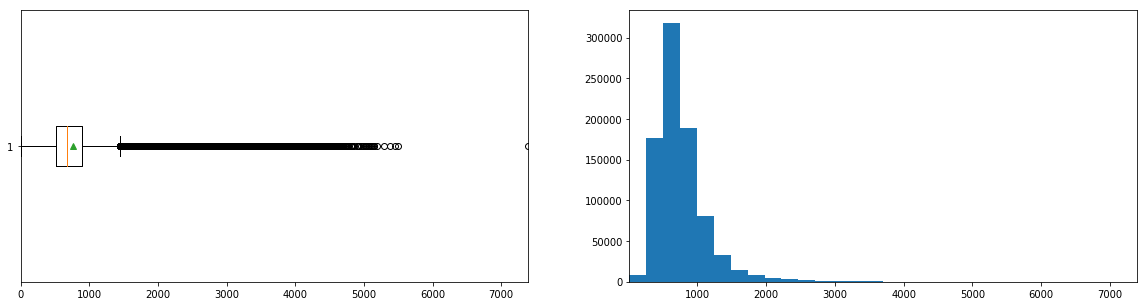

In [45]:
fig , ax = plt.subplots(1 , 2 , figsize = (20 , 5))
ax[0].boxplot(dstrain.Customers , showmeans=True , vert=False)
ax[0].set_xlim(0, max(dstrain["Customers"]))

ax[1].hist(dstrain.Customers , cumulative = False , bins = 30 )
ax[1].set_xlim((min(dstrain.Customers) , max(dstrain.Customers)))